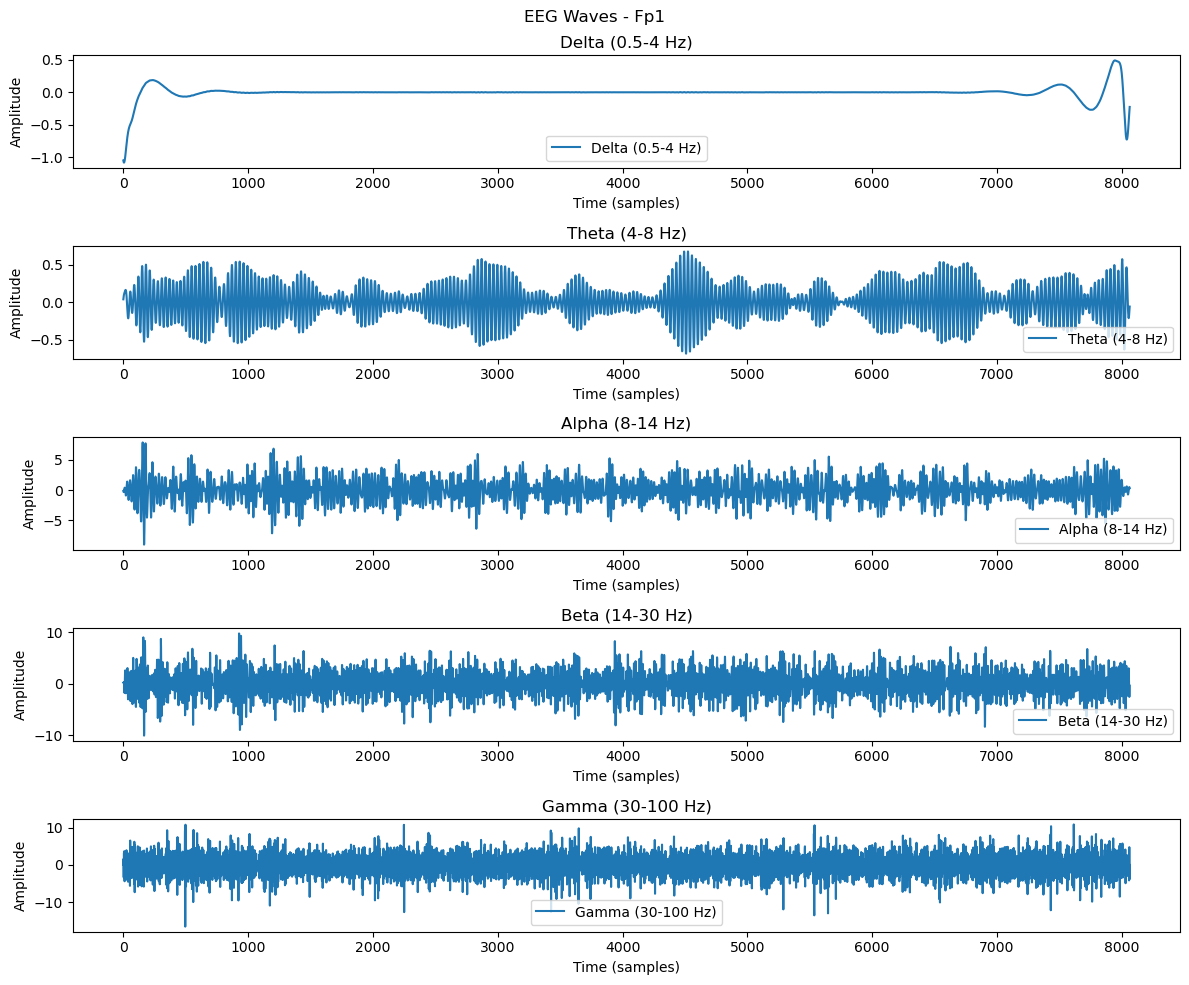

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

def load_eeg_data(filepath, channel):
    """Loads EEG data from a CSV file and extracts a specific channel."""
    df = pd.read_csv(filepath)
    if channel not in df.columns:
        raise ValueError(f"Channel {channel} not found in the dataset.")
    return df[channel].values

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    """Applies a Butterworth bandpass filter to isolate specific EEG frequency bands."""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def plot_eeg_waves(waves, labels, title="EEG Frequency Bands"):
    """Plots different EEG waves."""
    plt.figure(figsize=(12, 10))
    for i, (wave, label) in enumerate(zip(waves, labels)):
        plt.subplot(len(waves), 1, i + 1)
        plt.plot(wave, label=label)
        plt.title(label)
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude")
        plt.legend()
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def main():
    """Main function to process EEG data and visualize different waves."""
    filepath = "features_raw.csv"  # Update with the actual path
    channel = "Fp1"  # Change based on available channels
    fs = 256  # Adjust if your dataset has a different sampling rate

    try:
        raw_signal = load_eeg_data(filepath, channel)
        
        # Extract different EEG waves
        delta_wave = bandpass_filter(raw_signal, 0.5, 4, fs)
        theta_wave = bandpass_filter(raw_signal, 4, 8, fs)
        alpha_wave = bandpass_filter(raw_signal, 8, 14, fs)
        beta_wave = bandpass_filter(raw_signal, 14, 30, fs)
        gamma_wave = bandpass_filter(raw_signal, 30, 100, fs)
        
        waves = [delta_wave, theta_wave, alpha_wave, beta_wave, gamma_wave]
        labels = ["Delta (0.5-4 Hz)", "Theta (4-8 Hz)", "Alpha (8-14 Hz)", "Beta (14-30 Hz)", "Gamma (30-100 Hz)"]
        
        plot_eeg_waves(waves, labels, title=f"EEG Waves - {channel}")
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()
